# ANALYSE DES DONNEES DU BLACK FRIDAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Enoncé du problème
Une entreprise de vente au détail "ABC Private Limited" souhaite comprendre le comportement d'achat des clients (plus précisément, le montant des achats) pour divers produits de différentes catégories. Elle a partagé le récapitulatif des achats de divers clients pour certains produits à fort volume du mois dernier. L'ensemble de données contient également des données démographiques sur les clients (âge, sexe, état civil, type de ville, séjour dans la ville actuelle), des détails sur les produits (numéro de produit et catégorie de produit) et le montant total des achats du mois dernier.

Maintenant, ils veulent construire un modèle pour prédire le montant des achats des clients pour différents produits, ce qui les aidera à créer des offres personnalisées pour les clients pour différents produits.


### Nettoyage et preparation de la donnée pou l'entrainement

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Combinons les deux datasets

df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.drop(['User_ID'], axis=1, inplace=True)

In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
# Transformation numérique de Gender
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [10]:
# Transformation cagégorielle de Age
print('Avant transformation')
print(df['Age'].unique())
age = {'0-17': 0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}
df['Age'] = df['Age'].map(age)
print('Apres transformation')
print(df['Age'].unique())


Avant transformation
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Apres transformation
[0 6 2 4 5 3 1]


In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [14]:
df_city = pd.get_dummies(df['City_Category'])
df = pd.concat([df, df_city], axis=1)
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,1,0,0


In [15]:
df.drop(['City_Category'], axis=1, inplace=True)
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,1,0,0


In [16]:
# Les valeurs manquantes
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [18]:
# Vue que c'est une série catégorielle je remplace les Na par la mode
mode = df['Product_Category_2'].mode()[0]
print("la mode de cette variable est : ", mode)
# Faisons le remplacement
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode)
print("La valeur manquante est : ", df['Product_Category_2'].isnull().sum())

la mode de cette variable est :  8.0
La valeur manquante est :  0


In [19]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [20]:
# Vue que c'est une série catégorielle je remplace les Na par la mode
mode = df['Product_Category_3'].mode()[0]
print("la mode de cette variable est : ", mode)
# Faisons le remplacement
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode)
print("La valeur manquante est : ", df['Product_Category_3'].isnull().sum())

la mode de cette variable est :  16.0
La valeur manquante est :  0


In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,0,1


In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
# Remplaçons le 4+ par 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_9536/3896583798.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  uint8  
 11  B                           783667 non-null  uint8  
 12  C                           783667 non-null  uint8  
dtypes: float64(3),

In [26]:
# Nous allons convertir les variables de type objet et uint8 en int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df["A"] = df['A'].astype(int)
df["B"] = df['B'].astype(int)
df["C"] = df['C'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3),

## Visualisation

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

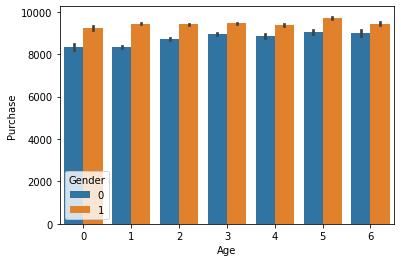

In [28]:
sns.barplot('Age','Purchase', data=df, hue= 'Gender')

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

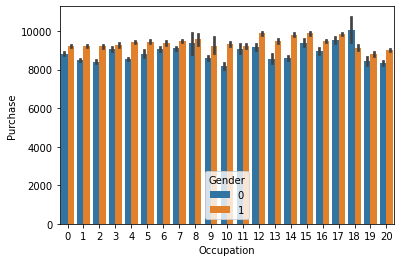

In [29]:
sns.barplot('Occupation','Purchase', data=df, hue= 'Gender')

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

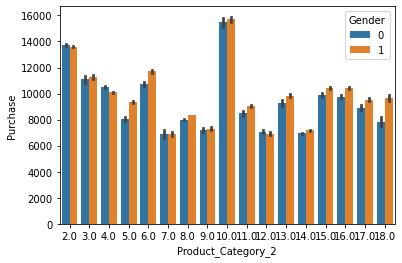

In [30]:
sns.barplot('Product_Category_2','Purchase', data=df, hue= 'Gender')

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

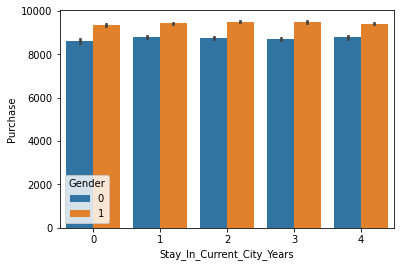

In [31]:
sns.barplot('Stay_In_Current_City_Years','Purchase', data=df, hue= 'Gender')

In [32]:
# Scaling
df.drop('Product_ID', axis=1, inplace=True)
df_test = df[df['Purchase'].isnull()] # pour selection que les Purchase qui n'ont pas de valeur
df_train = df[~df['Purchase'].isnull()] # le signe ~ permet de sectionner le contraire de la condition

In [40]:
df_test.drop('Purchase', axis=1, inplace=True)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
X = df_train.drop('Purchase', axis=1)
y = df_train['Purchase']

X.shape , y.shape

((550068, 11), (550068,))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## La prédiction

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
#  Instancier les différents modèles de prédiction
models = [LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
model_names = ["Linear Regression", "K-Nearest Neighbors", "Support Vector Regression", "Decision Tree", "Random Forest"]

In [39]:
# Boucle pour entraîner et évaluer chaque modèle
"""for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("{} a un score R² de {:.2f}".format(name, score)) """

'for model, name in zip(models, model_names):\n    model.fit(X_train, y_train)\n    score = model.score(X_test, y_test)\n    print("{} a un score R² de {:.2f}".format(name, score)) '